# Treating Skin Disease Identification as a simple 3 classes classification Task
## Choose classes.
We have choosen 3 classes with equal amount of images = 151 hence there is no class imbalance.

## Results

### Without Image augmentation
The model heavily overfitted, possible reasons are not enough data as it was working fine on binary classifcation with val-accuracy remaining under 50%

### With Image Augmentation.
The model improved substantially with val-accuracy reaching 70% with few parameter changes But still not enougb with an accuracy of 95%

### After Hyperparamter optimization and adjusting epochs 
The model improved slightly with the accuracy reaching 98% with validation accuracy reaching 77%, still model being quite overfitted.

## Further Steps
- Try this on binary segmented data images using a pre-trained model of segment anything
- Try this with Otus's segmentation
- Improve the architecture of the model this is a very prelimnary architecture.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

dataset_path = ""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        dataset_path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/fitzpatrick
/kaggle/input/fitzpatrick/CategorizedFitz
/kaggle/input/fitzpatrick/CategorizedFitz/pityriasis rubra pilaris
/kaggle/input/fitzpatrick/CategorizedFitz/neutrophilic dermatoses
/kaggle/input/fitzpatrick/CategorizedFitz/nevocytic nevus
/kaggle/input/fitzpatrick/CategorizedFitz/dermatomyositis
/kaggle/input/fitzpatrick/CategorizedFitz/factitial dermatitis
/kaggle/input/fitzpatrick/CategorizedFitz/malignant melanoma
/kaggle/input/fitzpatrick/CategorizedFitz/granuloma annulare
/kaggle/input/fitzpatrick/CategorizedFitz/stevens johnson syndrome
/kaggle/input/fitzpatrick/CategorizedFitz/langerhans cell histiocytosis
/kaggle/input/fitzpatrick/CategorizedFitz/lupus subacute
/kaggle/input/fitzpatrick/CategorizedFitz/nevus sebaceous of jadassohn
/kaggle/input/fitzpatrick/CategorizedFitz/hidradenitis
/kaggle/input/fitzpatrick/CategorizedFitz/urticaria pigmentosa
/kaggle/input/fitzpatrick/CategorizedFitz/acne vulgaris
/kaggle/input/fitzpatrick/CategorizedFitz/n

In [2]:
files_list = glob.glob("/kaggle/input/fitzpatrick/*")
files_list

['/kaggle/input/fitzpatrick/fitzPatrickCategorizer.py',
 '/kaggle/input/fitzpatrick/fitzpatrick_cleaned_annoted_data.xlsx',
 '/kaggle/input/fitzpatrick/fitzPatrickDownloader.py',
 '/kaggle/input/fitzpatrick/CategorizedFitz',
 '/kaggle/input/fitzpatrick/image.csv',
 '/kaggle/input/fitzpatrick/fitzpatrick17k.csv']

In [3]:
images = glob.glob('/kaggle/input/fitzpatrick/*/')[0]
images

'/kaggle/input/fitzpatrick/CategorizedFitz/'

In [4]:
label_151 = ['pediculosis lids', 'dermatomyositis', 'urticaria']


In [5]:
#Entirely used to make_directory of working classes
working_path = "/kaggle/working/working_classes"
import shutil
if not(os.path.exists(working_path)):
    os.mkdir(working_path)
for label in label_151:
    new_dir = working_path + "/" + label
    shutil.copytree(images + "/" + label, new_dir)
    
workings = glob.glob(working_path + "/*/")

In [6]:
workings

['/kaggle/working/working_classes/pediculosis lids/',
 '/kaggle/working/working_classes/urticaria/',
 '/kaggle/working/working_classes/dermatomyositis/']

In [7]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/66c29e61739db4535bf5e8f472ea346a.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/9f2521a07b5f8acca19872f2b5e7d842.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/ee1ac3800fde220846555bf3c6dfbc47.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/10134f12af27189d52398d32278d5848.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/fc1780e365feca275ecee17614814ab8.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/bd70fbb7442412ce54b1420b61bbfc07.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/31db72d42e3f8d037635d20c1b9ffdd3.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/7d28bd55747a91f1766a0a708e97599a.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/c76e443d3f69d02f25983903b64dfc83.jpg', '/kaggle/input/fitzpatrick/CategorizedFitz/pediculosis lids/5aa5b93b939e9bad217b6dfbd1e76dd0.jpg', '/kaggle/

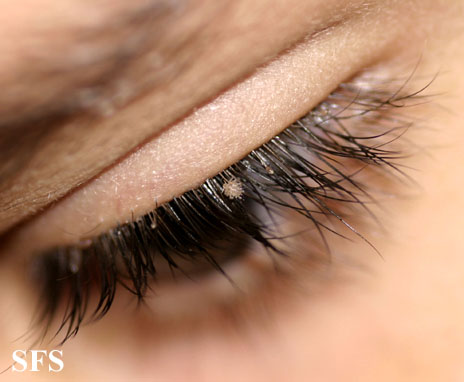

In [8]:
urticaria = glob.glob(images + label_151[0] + "/*")
print(urticaria)
PIL.Image.open(urticaria[1])

In [9]:
batch_size = 32
img_height = 256
img_width = 256

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 453 files belonging to 3 classes.
Using 363 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  working_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 453 files belonging to 3 classes.
Using 90 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['dermatomyositis', 'pediculosis lids', 'urticaria']


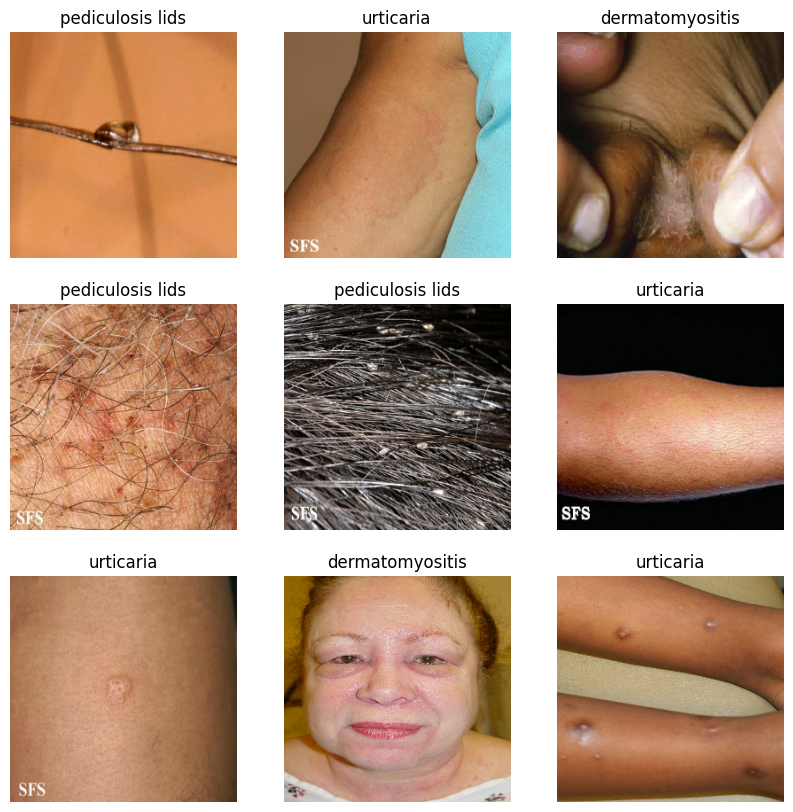

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
#The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
#Just for performance, so dataset doesn't become bottleneck, mostly not needed here
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
data_augmentation_horizontal = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

  ]
)

data_augmentation_vertical = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("vertical", input_shape= (img_height, img_width, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

In [54]:
num_classes = 3

model = tf.keras.Sequential([
  data_augmentation_horizontal,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(num_classes)
])

In [55]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                               

In [59]:
history  = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
12/12 [==============================] - 1s 43ms/step - loss: 0.0563 - accuracy: 0.9890 - val_loss: 1.0501 - val_accuracy: 0.7333
Epoch 2/50
12/12 [==============================] - 0s 37ms/step - loss: 0.0429 - accuracy: 0.9890 - val_loss: 1.3123 - val_accuracy: 0.6889
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 0.0807 - accuracy: 0.9669 - val_loss: 1.3298 - val_accuracy: 0.6667
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.1298 - accuracy: 0.9449 - val_loss: 1.0672 - val_accuracy: 0.7444
Epoch 5/50
12/12 [==============================] - 0s 37ms/step - loss: 0.0776 - accuracy: 0.9669 - val_loss: 1.1257 - val_accuracy: 0.7667
Epoch 6/50
12/12 [==============================] - 0s 38ms/step - loss: 0.0699 - accuracy: 0.9752 - val_loss: 1.0481 - val_accuracy: 0.7556
Epoch 7/50
12/12 [==============================] - 0s 37ms/step - loss: 0.0785 - accuracy: 0.9725 - val_loss: 1.2462 - val_accuracy: 0.7222
Epoch 8/50
12

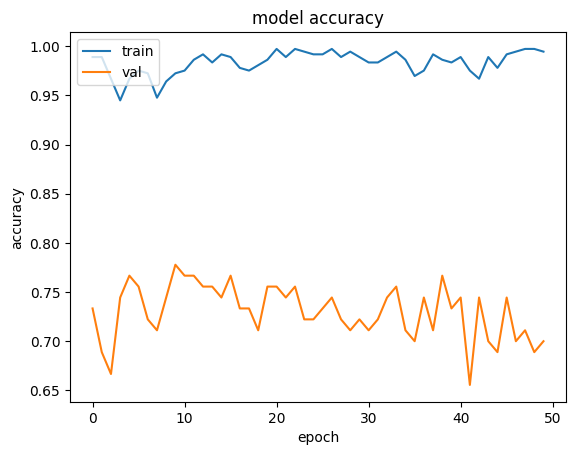

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

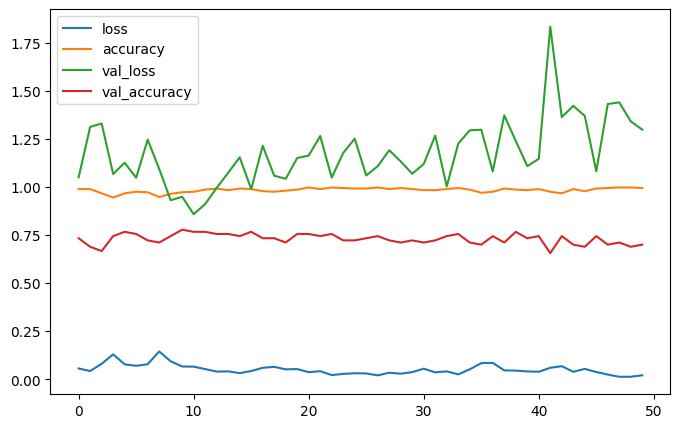

In [61]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
os.mkdir("/kaggle/working/experiment_01_image_augmentation_tf_image_classification")


In [64]:
plt.savefig("/kaggle/working/experiment_01_image_augmentation_tf_image_classification/metrics_chart.png")

<Figure size 640x480 with 0 Axes>